In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
##Import the dataset from a CSV file into a DataFrame
train = pd.read_csv('Utah_County_Single_family_Homes_2.0.csv', delimiter = ',')

type(train)

pandas.core.frame.DataFrame

In [3]:
train.head()

,yprice,bathrooms,bedrooms,daysOnMarket,lot,sqFeet,yrBuilt,cul_de_sac,den,diningRoom,laundry
0,239900,3,5,1138,0.12,2833,2004,Y,N,Y,Y
1,475000,4,6,1098,0.26,3735,2006,N,Y,Y,Y
2,389400,3,4,1041,0.35,3169,2010,N,Y,N,Y
3,259900,2,4,909,0.28,3196,1983,N,Y,N,Y
4,270000,4,3,853,0.33,3656,2004,Y,Y,N,Y


In [4]:
#Examine the data using describe
train.describe()

,yprice,bathrooms,bedrooms,daysOnMarket,lot,sqFeet,yrBuilt
count,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000
mean,246062.891786,2.866362,4.063885,154.086050,0.271825,3261.385267,2003.793351
std,67683.390215,0.688932,1.032334,152.115979,0.198514,694.530048,9.251628
min,162900.000000,2.000000,3.000000,1.000000,0.010000,2050.000000,1975.000000
25%,199900.000000,2.000000,3.000000,44.250000,0.190000,2736.000000,2000.000000
50%,226400.000000,3.000000,4.000000,108.000000,0.230000,3156.500000,2007.000000
75%,274900.000000,3.000000,5.000000,209.000000,0.290000,3703.500000,2011.000000
max,499900.000000,5.000000,6.000000,1138.000000,2.100000,5133.000000,2011.000000


Text(0, 0.5, 'Number of homes')

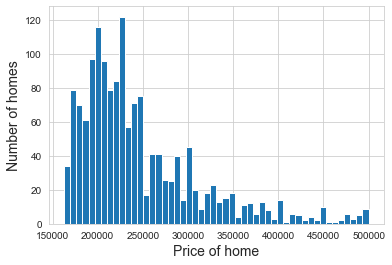

In [5]:
## Make a histogram of our dependent variable
plt.hist(train.yprice, bins = 50)
plt.xlabel('Price of home', fontsize=14)
plt.ylabel('Number of homes', fontsize=14)

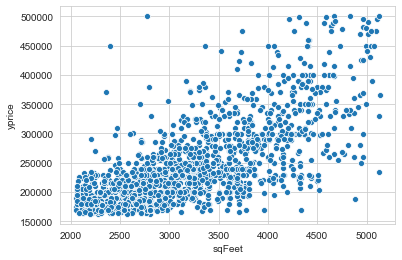

In [6]:
## Scatter Plot of price by sqFeet
ax = sns.scatterplot(x="sqFeet", y="yprice", data=train)

In [7]:
import sklearn 
from sklearn.linear_model import LinearRegression


train = pd.get_dummies(train, prefix = ['cul_de_sac', 'den', 'diningRoom', 'laundry'],
                      columns = ['cul_de_sac', 'den', 'diningRoom', 'laundry'],
                      drop_first=True)
train.head()

,yprice,bathrooms,bedrooms,daysOnMarket,lot,sqFeet,yrBuilt,cul_de_sac_Y,den_Y,diningRoom_Y,laundry_Y
0,239900,3,5,1138,0.12,2833,2004,1,0,1,1
1,475000,4,6,1098,0.26,3735,2006,0,1,1,1
2,389400,3,4,1041,0.35,3169,2010,0,1,0,1
3,259900,2,4,909,0.28,3196,1983,0,1,0,1
4,270000,4,3,853,0.33,3656,2004,1,1,0,1


In [8]:
## Create a function to create a heatmap correlation table
def CorrelationTable(df, width, height):

    # Create Correlation df from source df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(width, height))
    # Drop self-correlations
    dropSelf = np.zeros_like(corr)
    dropSelf[np.triu_indices_from(dropSelf)] = True 

    # Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f", mask=dropSelf, 
        xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, cbar_kws={"shrink": .7},
            vmin = -1, vmax=1, center=0)
    plt.title('Correlation HeatMap',fontsize=14)
    plt.show()  

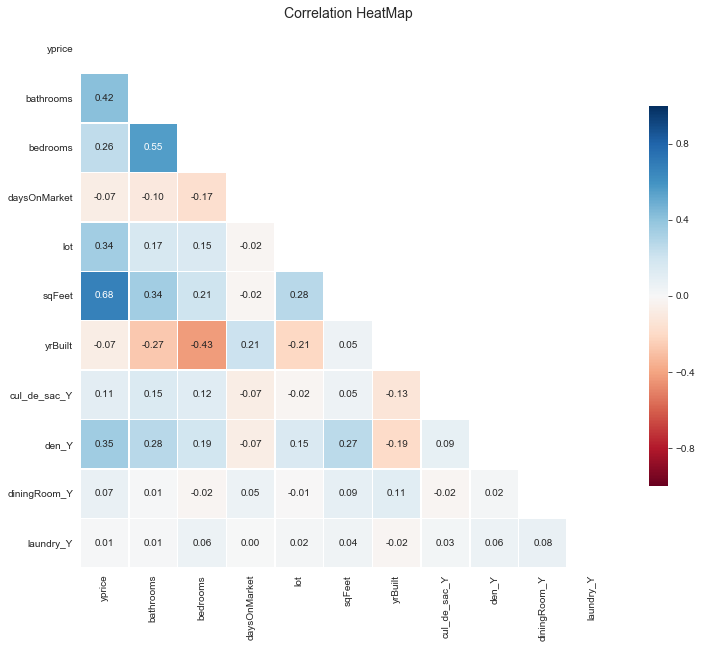

In [9]:
CorrelationTable(train,12,10)

In [10]:
x_vars = train.drop(columns = ['yprice'])

y_vars= train.yprice

print(type(x_vars))
print(type(y_vars))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
from sklearn.model_selection import train_test_split

# Partition the datasets
x_train, x_valid, y_train, y_valid = train_test_split(x_vars, y_vars,
                                                     test_size=0.4,
                                                     random_state=1)
# Create sorted versions
x_train = x_train.sort_index()
x_valid = x_valid.sort_index()
y_train = y_train.sort_index()
y_valid = y_valid.sort_index()

print(x_train.head())
print(x_valid.head())
print(y_train.head())
print(y_valid.head())

   bathrooms  bedrooms  daysOnMarket   lot  sqFeet  yrBuilt  cul_de_sac_Y  \
0          3         5          1138  0.12    2833     2004             1   
1          4         6          1098  0.26    3735     2006             0   
2          3         4          1041  0.35    3169     2010             0   
4          4         3           853  0.33    3656     2004             1   
5          3         4           803  0.25    2280     2007             1   

   den_Y  diningRoom_Y  laundry_Y  
0      0             1          1  
1      1             1          1  
2      1             0          1  
4      1             0          1  
5      0             1          1  
    bathrooms  bedrooms  daysOnMarket   lot  sqFeet  yrBuilt  cul_de_sac_Y  \
3           2         4           909  0.28    3196     1983             0   
6           3         6           788  0.21    3254     2003             0   
8           3         3           787  0.13    2216     2002             0   
9        

In [12]:
# Get linear regression method from library
from sklearn.linear_model import LinearRegression

# Create multiple linear regression object
mlr = LinearRegression()

## step 2: fit (train) the linear model with the training data
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Get the intercept and coefficients for the input variables
print("Intercept: {0:.3f} ".format(mlr.intercept_))

coeff_df = pd.DataFrame(mlr.coef_, x_train.columns, columns=['Coefficient'])
coeff_df

Intercept: 560937.288 


,Coefficient
bathrooms,14081.790785
bedrooms,-171.046696
daysOnMarket,-0.341640
lot,56405.843185
sqFeet,53.790459
yrBuilt,-267.010558
cul_de_sac_Y,10685.235918
den_Y,24499.523183
diningRoom_Y,-506.733085
laundry_Y,-18364.006529


In [15]:
# Get the P-value of the coefficients
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())
#print(round(est2.pvalues.astype('float'),3))

                            OLS Regression Results                            
Dep. Variable:                 yprice   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sat, 28 Sep 2019   Prob (F-statistic):          9.68e-154
Time:                        11:20:14   Log-Likelihood:                -11185.
No. Observations:                 920   AIC:                         2.239e+04
Df Residuals:                     909   BIC:                         2.245e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.609e+05    3.9e+05      1.439   

In [16]:
y_pred = mlr.predict(x_valid)

In [17]:
# Create a Datafram to display the results of the actual and the predicted values
df = DataFrame({'Actual': y_valid, 'Predicted': y_pred})
df.head()

,Actual,Predicted
3,259900,252467.655188
6,265000,259573.184338
8,165000,176013.922858
9,206900,257636.287587
10,194900,233516.497465


In [19]:
# Evaluate the model fit for our model

R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))
               
print("R2: {0:.3f} ".format(R2))
print("MAE: {0:.1f} ".format(MAE))
print("RMSE: {0:.1f} ".format(RMSE))

R2: 0.502 
MAE: 34039.3 
RMSE: 45858.4 


In [20]:
# Remove the columns that were not significant predictors of price
x_train2 = x_train.drop(columns = ['bedrooms', 'daysOnMarket','yrBuilt','diningRoom_Y'])
x_valid2 = x_valid.drop(columns = ['bedrooms', 'daysOnMarket','yrBuilt','diningRoom_Y'])
print(x_train2.head())
print(x_valid2.head())

,bathrooms,lot,sqFeet,cul_de_sac_Y,den_Y,laundry_Y
0,3,0.12,2833,1,0,1
1,4,0.26,3735,0,1,1
2,3,0.35,3169,0,1,1
4,4,0.33,3656,1,1,1
5,3,0.25,2280,1,0,1


In [22]:
# Fit the new regression
mlr.fit(x_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Look at the model
X2 = sm.add_constant(x_train2)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(round(est2.pvalues.astype('float'),3))

const           0.024
bathrooms       0.000
lot             0.000
sqFeet          0.000
cul_de_sac_Y    0.013
den_Y           0.000
laundry_Y       0.008
dtype: float64


C:\Users\rdmcl\Anaconda3.1\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
# get the intercept and coefficients for the input variables
print("Intercept: {0:.3f} ".format(mlr.intercept_))

coeff_df = pd.DataFrame(mlr.coef_, x_train2.columns, columns=['Coefficient'])
coeff_df

Intercept: 24793.800 


,Coefficient
bathrooms,14917.076737
lot,58785.852307
sqFeet,52.792289
cul_de_sac_Y,11249.640856
den_Y,25371.124058
laundry_Y,-18325.833987


In [25]:
# Get the P-Value of the coefficients
X2 = sm.add_constant(x_train2)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 yprice   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     191.5
Date:                Sat, 28 Sep 2019   Prob (F-statistic):          1.05e-157
Time:                        11:32:32   Log-Likelihood:                -11186.
No. Observations:                 920   AIC:                         2.239e+04
Df Residuals:                     913   BIC:                         2.242e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.479e+04    1.1e+04      2.258   

In [26]:
y_pred = mlr.predict(x_valid2)

df = DataFrame({'Actual': y_valid, 'Predicted': y_pred})  

df.head()

,Actual,Predicted
3,259900,246857.438448
6,265000,260721.458301
8,165000,175849.069794
9,206900,259118.362196
10,194900,234008.019190


In [27]:
R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))

print("R2: {0:.3f} ".format(R2))
print("MAE: {0:.1f} ".format(MAE))
print("RMSE: {0:.1f} ".format(RMSE)) 

R2: 0.508 
MAE: 33825.2 
RMSE: 45572.0 
